## Task-D: Collinear features and their effect on linear models

In [25]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('task_d.csv')

In [27]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [28]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
feature_mapping = {1:'x',2:'y',3:'z',4:'x*x',5:'2*y',6:'2*z+3*x*x',7:'w'}

In [29]:
print(X.shape)
print(Y.shape)
#print(X[1:10])
#print((X+100)[1:10])

(100, 7)
(100,)


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

***************Heat Map of correlation between feature***********************


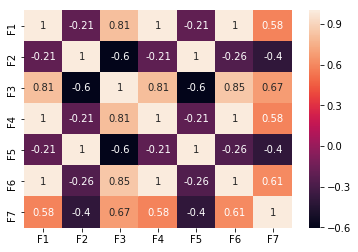

In [30]:
#Doing perturbation test to check the presence of collinearity
#Task: 1 Logistic Regression

#Finding the Correlation between the features via Pearson Correlation Cofficient 
correlation_coef = np.corrcoef(X,rowvar=False)
#print(correlation_coef.shape)
#print(correlation_coef)

#Adding column names, row names for more readability 
df = pd.DataFrame(correlation_coef,columns=["F1","F2","F3","F4","F5","F6","F7"],index = ["F1","F2","F3","F4","F5","F6","F7"])
#print(df)
print("***************Heat Map of correlation between feature***********************")
ax =sns.heatmap(df,annot = True, xticklabels=True, yticklabels=True)

In [31]:
#Finding the best model for the given data
#Train Logistic regression on data(X,Y) that we have created in the above cell
logistic_regression = SGDClassifier(loss='log',random_state = 20)
logistic_regression.fit(X,Y)

#Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1, 10,100,1000,10000]}
clf = GridSearchCV(logistic_regression, parameters)
clf.fit(X,Y)
#print(clf.cv_results_)
print("********Best Estimator********")
best_alpha = clf.best_params_['alpha']
print(clf.best_estimator_)
print(clf.best_params_)
#print(clf.cv_results_)

#Creat a new Logistic regression with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'
best_model = SGDClassifier(loss = 'log',alpha = best_alpha,random_state =20)
best_model.fit(X,Y)


********Best Estimator********
SGDClassifier(alpha=0.01, loss='log', random_state=20)
{'alpha': 0.01}


SGDClassifier(alpha=0.01, loss='log', random_state=20)

In [32]:
#Getting the weights with the original data
#Check the accuracy of the model 'best_model_accuracy'
class_weights = best_model.coef_[0]
best_model_accuracy = best_model.score(X,Y)
print("Best Model Accuracy: ", best_model_accuracy)

#Get the weights W using best_model.coef_
print("Best Model's Class Weights: ", class_weights)



Best Model Accuracy:  1.0
Best Model's Class Weights:  [ 0.726548   -0.89728841  1.72389953  0.66247604 -0.89728841  0.80436469
  0.50135355]


In [33]:
#Modifying original data
#Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
e = 0.01
print("X before Pertuberation:")
print(X[0:1])
X = X+e
print("X after Pertuberation:")
print(X[0:1])

#Train the same 'best_model' with data (X', Y)
best_model.fit(X,Y)

#Check the accuracy of the model 'best_model_accuracy_edited'
print("*******************************************************************************************")
best_model_accuracy_edited = best_model.score(X,Y)
print("Best Model Accuracy After Pertuberation: ", best_model_accuracy_edited)

#Get the weights W' using best_model.coef_
class_weights_edited = best_model.coef_[0]
print("Best Model's Class Weights: ", class_weights_edited)

X before Pertuberation:
[[-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
  -0.53627703]]
X after Pertuberation:
[[-0.5710659   0.85183714 -1.00297765 -0.59402468  0.85183714 -0.65592679
  -0.52627703]]
*******************************************************************************************
Best Model Accuracy After Pertuberation:  1.0
Best Model's Class Weights:  [ 0.72665047 -0.89716276  1.72336461  0.66294523 -0.89716276  0.80469158
  0.50207115]


In [34]:
# Checking deviations in metric and weights 
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
accuracy_difference = (best_model_accuracy_edited-best_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy': ",accuracy_difference)

# find the absolute change between each value of W and W' ==> |(W-W')|
class_weigths_difference = abs(class_weights - class_weights_edited)
print("Absolute change between each value of W and W': ",class_weigths_difference)

# print the top 4 features which have higher % change in weights compare to the other feature
class_weigths_difference_pct_logistic = abs((class_weights - class_weights_edited) / class_weights)
print("class_weigths_difference_pct: ", class_weigths_difference_pct_logistic)
#print(np.argsort(class_weigths_difference_pct))
print("***********************************************************************************************")
#print(np.argsort(class_weigths_difference_pct)[:2:-1])

print("Top 4 features which have higher % change in weights compare to the other feature",[feature_mapping[i+1] for i in (np.argsort(class_weigths_difference_pct_logistic)[:2:-1])])


difference between 'best_model_accuracy_edited' and 'best_model_accuracy':  0.0
Absolute change between each value of W and W':  [0.00010247 0.00012565 0.00053492 0.0004692  0.00012565 0.00032689
 0.0007176 ]
class_weigths_difference_pct:  [0.00014103 0.00014003 0.0003103  0.00070825 0.00014003 0.00040639
 0.00143133]
***********************************************************************************************
Top 4 features which have higher % change in weights compare to the other feature ['w', 'x*x', '2*z+3*x*x', 'z']


In [35]:
#***************Perform Steps 2 to 5 with SVM*******************
#Finding the best model for the given data
#Train svm on data(X,Y) that we have created in the above cell
svm = SGDClassifier(loss='hinge',random_state =20)
svm.fit(X,Y)

#Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1, 10,100,1000,10000]}
clf = GridSearchCV(svm, parameters)
clf.fit(X,Y)
#print(clf.cv_results_)
print("********Best Estimator********")
best_alpha = clf.best_params_['alpha']
print(clf.best_estimator_)
print(clf.best_params_)
#print(clf.cv_results_)

#Creat a new svm with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'
best_model = SGDClassifier(loss = 'log',alpha = best_alpha,random_state = 20)
best_model.fit(X,Y)


********Best Estimator********
SGDClassifier(alpha=0.1, random_state=20)
{'alpha': 0.1}


SGDClassifier(alpha=0.1, loss='log', random_state=20)

In [36]:
#Getting the weights with the original data
#Check the accuracy of the model 'best_model_accuracy'
class_weights = best_model.coef_[0]
best_model_accuracy = best_model.score(X,Y)
print("Best Model Accuracy: ", best_model_accuracy)

#Get the weights W using best_model.coef_
print("Best Model's Class Weights: ", class_weights)


Best Model Accuracy:  1.0
Best Model's Class Weights:  [ 0.4078346  -0.52117395  0.79424456  0.38563394 -0.52117395  0.4429374
  0.34597669]


In [37]:
#Modifying original data
#Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
e = 0.01
print("X before Pertuberation:")
print(X[0:1])
X = X+e
print("X after Pertuberation:")
print(X[0:1])

#Train the same 'best_model' with data (X', Y)
best_model.fit(X,Y)

#Check the accuracy of the model 'best_model_accuracy_edited'
print("*******************************************************************************************")
best_model_accuracy_edited = best_model.score(X,Y)
print("Best Model Accuracy After Pertuberation: ", best_model_accuracy_edited)

#Get the weights W' using best_model.coef_
class_weights_edited = best_model.coef_[0]
print("Best Model's Class Weights: ", class_weights_edited)

X before Pertuberation:
[[-0.5710659   0.85183714 -1.00297765 -0.59402468  0.85183714 -0.65592679
  -0.52627703]]
X after Pertuberation:
[[-0.5610659   0.86183714 -0.99297765 -0.58402468  0.86183714 -0.64592679
  -0.51627703]]
*******************************************************************************************
Best Model Accuracy After Pertuberation:  1.0
Best Model's Class Weights:  [ 0.40800789 -0.52064558  0.79465013  0.3858671  -0.52064558  0.44316916
  0.34658003]


In [38]:
# Checking deviations in metric and weights 
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
accuracy_difference = (best_model_accuracy_edited-best_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy': ",accuracy_difference)

# find the absolute change between each value of W and W' ==> |(W-W')|
class_weigths_difference = abs(class_weights - class_weights_edited)
print("Absolute change between each value of W and W': ",class_weigths_difference)

# print the top 4 features which have higher % change in weights compare to the other feature
class_weigths_difference_pct_svm = abs((class_weights - class_weights_edited) / class_weights)
print("class_weigths_difference_pct: ", class_weigths_difference_pct_svm)
#print(np.argsort(class_weigths_difference_pct))
print("***********************************************************************************************")
#print(np.argsort(class_weigths_difference_pct)[:2:-1])

print("Top 4 features which have higher % change in weights compare to the other feature",[feature_mapping[i+1] for i in (np.argsort(class_weigths_difference_pct_svm)[:2:-1])])


difference between 'best_model_accuracy_edited' and 'best_model_accuracy':  0.0
Absolute change between each value of W and W':  [0.00017328 0.00052838 0.00040557 0.00023316 0.00052838 0.00023176
 0.00060334]
class_weigths_difference_pct:  [0.00042488 0.00101382 0.00051063 0.00060461 0.00101382 0.00052324
 0.00174387]
***********************************************************************************************
Top 4 features which have higher % change in weights compare to the other feature ['w', '2*y', 'y', 'x*x']


In [39]:
 #Print the top 4 feature names explicitly having the highest percentage change in both the tasks.

print("-"*70)
print("class_weigths_difference_pct via logistic: ", class_weigths_difference_pct_logistic)
print("-"*70)
print("class_weigths_difference_pct via SVM: ", class_weigths_difference_pct_svm)
print("No differnce in class_weigths_difference_pct via logistic and SVM ")
print("-"*70)
print("Top 4 features which have higher % change in weights in both cases [SVM] and [Logistic Regression]",[feature_mapping[i+1] for i in (np.argsort(class_weigths_difference_pct_svm)[:2:-1])])

----------------------------------------------------------------------
class_weigths_difference_pct via logistic:  [0.00014103 0.00014003 0.0003103  0.00070825 0.00014003 0.00040639
 0.00143133]
----------------------------------------------------------------------
class_weigths_difference_pct via SVM:  [0.00042488 0.00101382 0.00051063 0.00060461 0.00101382 0.00052324
 0.00174387]
No differnce in class_weigths_difference_pct via logistic and SVM 
----------------------------------------------------------------------
Top 4 features which have higher % change in weights in both cases [SVM] and [Logistic Regression] ['w', '2*y', 'y', 'x*x']


# Observation:
- Mean deviation of class weights for logistic regression: 0.1177683 
- Mean deviation of class weights for SVM: 0.037347999
- Therefore, SVM has less deviation and more robust to pertuberation of train data. 
- And, Feature 7 is more important in classification irrespective of algorithm selected.
- Top 4 features which have higher % change in weights in both cases [SVM] and [Logistic Regression] ['w', '2*y', 'y', 'x*x']